In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
from skimage import io,filters

from skimage.feature import hog
from skimage import data, exposure

In [86]:
train_pothole = "Pothole_dataset/Person_dataset/PNGImages"
train_normal= "Pothole_dataset/normal"
image_size = 128

In [87]:
####For renaming files..not needed for any use now..
for count, filename in enumerate(os.listdir("Pothole_dataset/Person_dataset/PNGImages")): 
        dst ="Person" + str(count) + ".jpg"
        src ='Pothole_dataset/Person_dataset/PNGImages/'+ filename 
        dst ='Pothole_dataset/Person_dataset/PNGImages/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Pothole_dataset/Person_dataset/PNGImages/Person10.jpg' -> 'Pothole_dataset/Person_dataset/PNGImages/Person2.jpg'

In [ ]:
i=1
for image in tqdm(os.listdir(train_pothole)): 
    path = os.path.join(train_pothole, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    i=i+1
    if(i==144):
        break
i=0 
for image2 in tqdm(os.listdir(train_normal)): 
    path = os.path.join(train_normal, image2)
    try:
      img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
      img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
      np_img2=np.asarray(img2)
      i=i+1
      if(i==142):
        break
    except:
      print("Something went wrong")
   

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("People and No People in GrayScale")

In [130]:
def train_data():
    train_data_pothole = [] 
    train_data_normal=[]
    i=0
    for image1 in tqdm(os.listdir(train_pothole)): 
        i=i+1
        if(i==123):
            break
        path = os.path.join(train_pothole, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        #img1=filters.gaussian(img1,sigma=2)
        #fd, img1 = hog(img1, orientations=9, pixels_per_cell=(10, 10),
                   # cells_per_block=(3, 3), visualize=True)
        #img1 = exposure.rescale_intensity(img1, in_range=(0, 10))
        #img1 = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)  
        #img1 = cv2.Canny(img1,400,200)
        train_data_pothole.append(img1) 
    i=0
    for image2 in tqdm(os.listdir(train_normal)):
        try:
            i=i+1
            if(i==123):
                break
            path = os.path.join(train_normal, image2)
            img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img2 = cv2.resize(img2, (image_size, image_size))
            #img2=filters.gaussian(img2,sigma=2)
            #fd, img2 = hog(img2, orientations=9, pixels_per_cell=(10, 10),
                    #cells_per_block=(3, 3), visualize=True)
            #img2 = exposure.rescale_intensity(img2, in_range=(0, 10))
            #img2 = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=5)
            #img2 = cv2.Canny(img2,400,200)
            train_data_normal.append(img2) 
        except:
            print("wrong")
    
    train_data= np.concatenate((np.asarray(train_data_pothole),np.asarray(train_data_normal)),axis=0)
    return train_data 


In [131]:
def test_data():
    test_data_pothole = [] 
    test_data_normal=[]
    i=0
    for image1 in tqdm(os.listdir(train_pothole)): 
        i=i+1
        if(i>=123):
            path = os.path.join(train_pothole, image1)
            img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img1 = cv2.resize(img1, (image_size, image_size))
            #img1=filters.gaussian(img1,sigma=2)
            #fd, img1 = hog(img1, orientations=9, pixels_per_cell=(10, 10),
                    #cells_per_block=(3, 3), visualize=True)
            #img1 = exposure.rescale_intensity(img1, in_range=(0, 10))
            #img1 = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
            #img1 = cv2.Canny(img1,400,200)
            test_data_pothole.append(img1) 
        if(i==153):
            break
            
    j=0
    for image2 in tqdm(os.listdir(train_normal)):
        try:
            j=j+1
            if(j>=122):
                path = os.path.join(train_normal, image2)
                img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
                img2 = cv2.resize(img2, (image_size, image_size))
                #img2=filters.gaussian(img2,sigma=2)
                #fd, img2 = hog(img2, orientations=9, pixels_per_cell=(10, 10),
                    #cells_per_block=(3, 3), visualize=True)
                #img2 = exposure.rescale_intensity(img2, in_range=(0, 10))
                #img2 = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=5) 
                #img2 = cv2.Canny(img2,400,200)
                test_data_normal.append(img2)
            if(j==153):
                break
        except:
            print("Something went wrong")
            
    
    test_data= np.concatenate((np.asarray(test_data_pothole),np.asarray(test_data_normal)),axis=0) 
    return test_data 

In [132]:
train_data = train_data() 
test_data = test_data()
print(train_data.shape)
print(test_data.shape)


 35%|███████████████████████████▌                                                   | 124/355 [00:00<00:00, 870.22it/s]

Something went wrong


 43%|█████████████████████████████████▊                                             | 152/355 [00:01<00:01, 150.37it/s]

(244, 128, 128)
(62, 128, 128)


In [133]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
print(x_data.shape[0])

306


In [134]:
z1 = np.zeros(122)
o1 = np.ones(122)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(31)
o = np.ones(31)
Y_test = np.concatenate((o, z), axis=0)

In [135]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [136]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (306, 128, 128)
Y shape:  (306, 1)


In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logReg= LogisticRegression()
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
print(x_train.shape)
print(y_train.shape)

logReg.fit(x_train,y_train)

(260, 16384)
(260, 1)


c:\users\swarali\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\swarali\anaconda3\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [140]:

print(logReg.predict(x_test[0].reshape(1,-1)))

[0.]


In [141]:
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))
predictions=logReg.predict(x_test)
print(predictions)

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]


In [142]:
score=logReg.score(x_test,y_test)
print(score)

0.8043478260869565


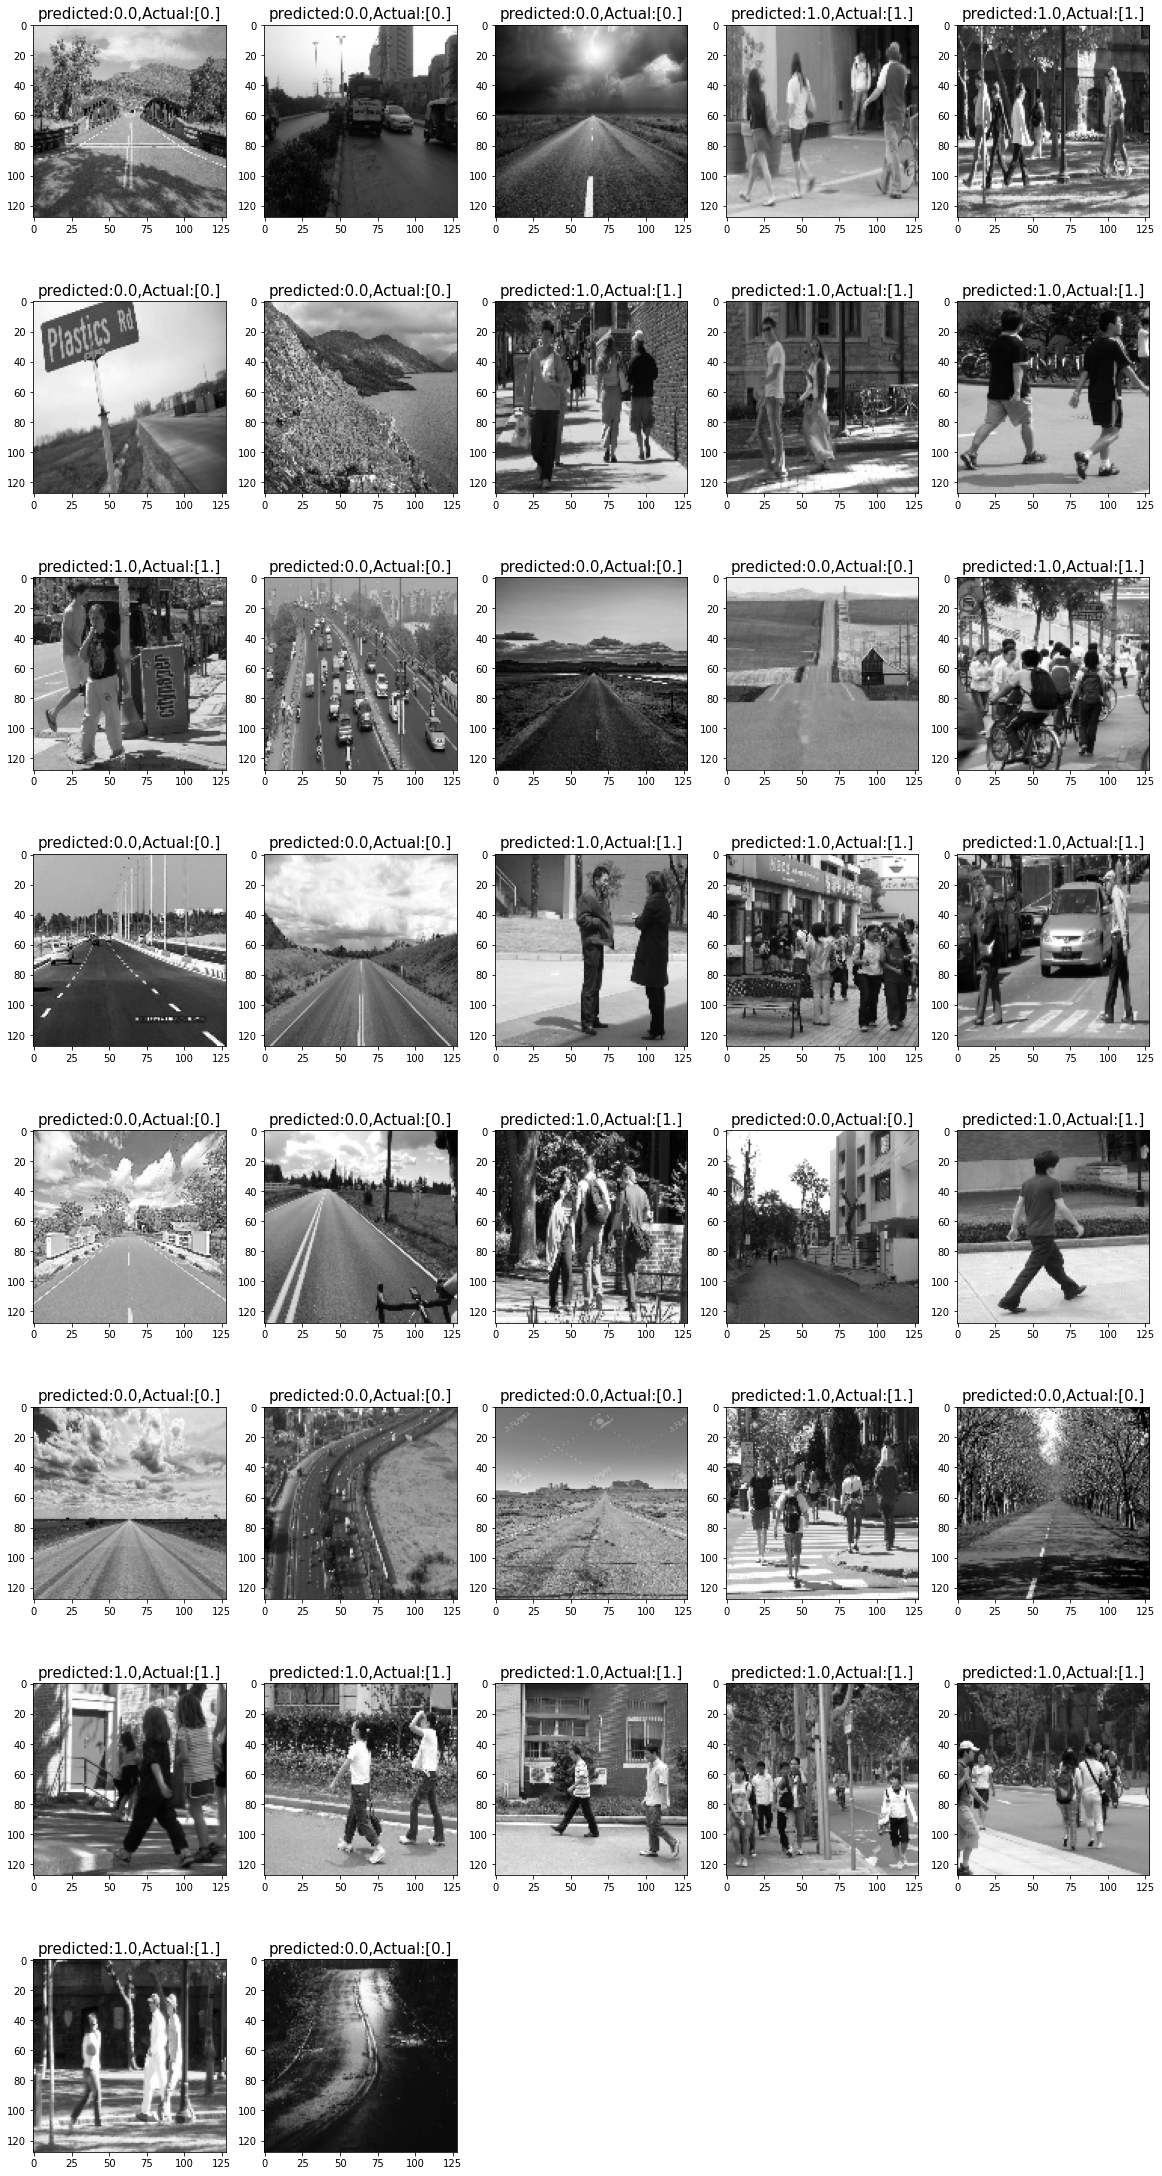

In [143]:
index=0
classifiedIndex=[]
for predict,actual in zip(predictions,y_test):
    if(predict==actual):
        classifiedIndex.append(index)
    index+=1
    
plt.figure(figsize=(20,50))
for plotIndex,wrong in enumerate(classifiedIndex):
    plt.subplot(10,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(128,128)),cmap=plt.cm.gray)
    plt.title("predicted:{},Actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=15)

In [ ]:
import cv2
import numpy as np

img = cv2.imread('Pothole_dataset/Person_dataset/PNGImages/Person5.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print (M)

In [ ]:


(x1,y1,w,h)=cv2.boundingRect(cnt)
rect=cv2.rectangle(img,(x1,y1),(x1+w,y1+h),(0,255,0),2)

cv2.imshow("Rectangled",rect) 


cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
cv2.imshow('image',img)

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.pyrDown(cv2.imread('Person0.jpg', cv2.IMREAD_UNCHANGED))

# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one

contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
#                cv2.CHAIN_APPROX_SIMPLE)

# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    #cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255))

    # finally, get the min enclosing circle
    #(x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    #center = (int(x), int(y))
    #radius = int(radius)
    # and draw the circle in blue
    #img = cv2.circle(img, center, radius, (255, 0, 0), 2)

print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

cv2.imshow("contours", img)

cv2.imshow("contours", img)

while True:
    key = cv2.waitKey(1)
    if key == 27: #ESC key to break
        break

cv2.destroyAllWindows()

In [2]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

Coordinates:  110 52 289 410
Person on the right side
Coordinates:  520 96 634 325
Person on the right side
Coordinates:  102 190 244 473
Person on the left side
Coordinates:  361 111 436 260
Person on the right side
Coordinates:  174 239 287 465
Person on the right side


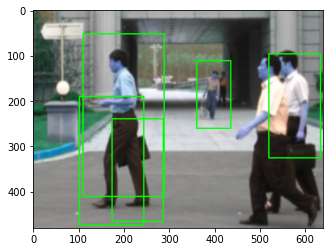

In [14]:
img = cv2.pyrDown(cv2.imread('Pothole_dataset/Person_dataset/PNGImages/Person7.jpg', cv2.IMREAD_UNCHANGED))

    # resizing for faster detection
img = cv2.resize(img, (640, 480))
    # using a greyscale picture, also for faster detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # detect people in the image
    # returns the bounding boxes for the detected objects
boxes, weights = hog.detectMultiScale(img, winStride=(8,8) )

boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
    cv2.rectangle(img, (xA, yA), (xB, yB),
                        (0, 255, 0), 2)
    print("Coordinates: ", xA,yA, xB, yB)
    if(xA<width/2 and xB<width/2):
        print("Person on the left side")
    else:
        print("Person on the right side")

    # Display the resulting frame
    plt.imshow(img)
    

In [10]:
im = Image.open('Pothole_dataset/Person_dataset/PNGImages/Person7.jpg')
width, height = im.size
print(width,height)

539 381
